In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn import model_selection
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score

In [5]:
#calling the file
hr=pd.read_csv('https://raw.githubusercontent.com/shantanu1109/IBM-HR-Analytics-Employee-Attrition-and-Performance-Prediction/main/DATASET/IBM-HR-Analytics-Employee-Attrition-and-Performance.csv')

In [6]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


This is the file that shows how Attrition affect companies and how does HR Analytics help in analyzing attrition.
Total no of rows are 1470 and 35 columns.

In [7]:
hr.head(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


This shows the first 15 rows and columns

In [8]:
hr.shape

(1470, 35)

total number of rows and columns.

In [10]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This shows that there are no null values. Most of dtype is int64 and 9 are object dtype.

In [11]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

This shows the name of all the columns.

In [12]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We can see that there are no null values.

In [13]:
hr.nunique().to_frame('No of unique values')

,No of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


This shows the unique values of the columns.

In [14]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


This statistical data shows that there are no missing values as the count of columns are same. 
There is not much difference between the mean and median(50%).
There are great  difference between the 75% and max which means there are outliers present in the dataset.

<Axes: >

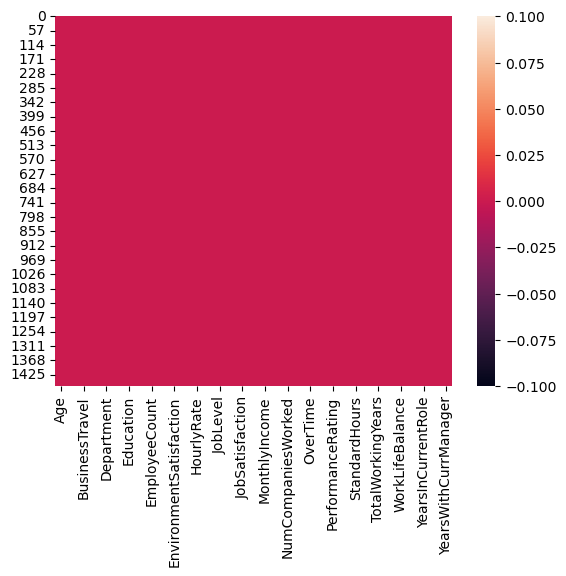

In [15]:
sns.heatmap(hr.isnull())

Visualization of the null values through heatmap.

<Axes: >

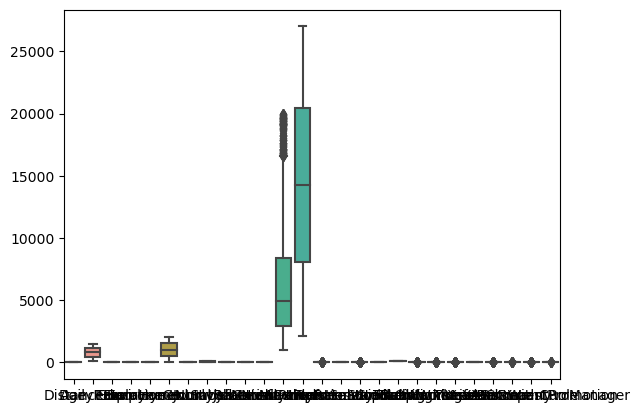

In [16]:
#dropping of duplicates values
hr.drop_duplicates(inplace=True)
sns.boxplot(hr)

In [17]:
hr.duplicated().sum()

0

There are no duplicate values.

In [18]:
#cheacking the correlation
hr.corr

<bound method DataFrame.corr of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

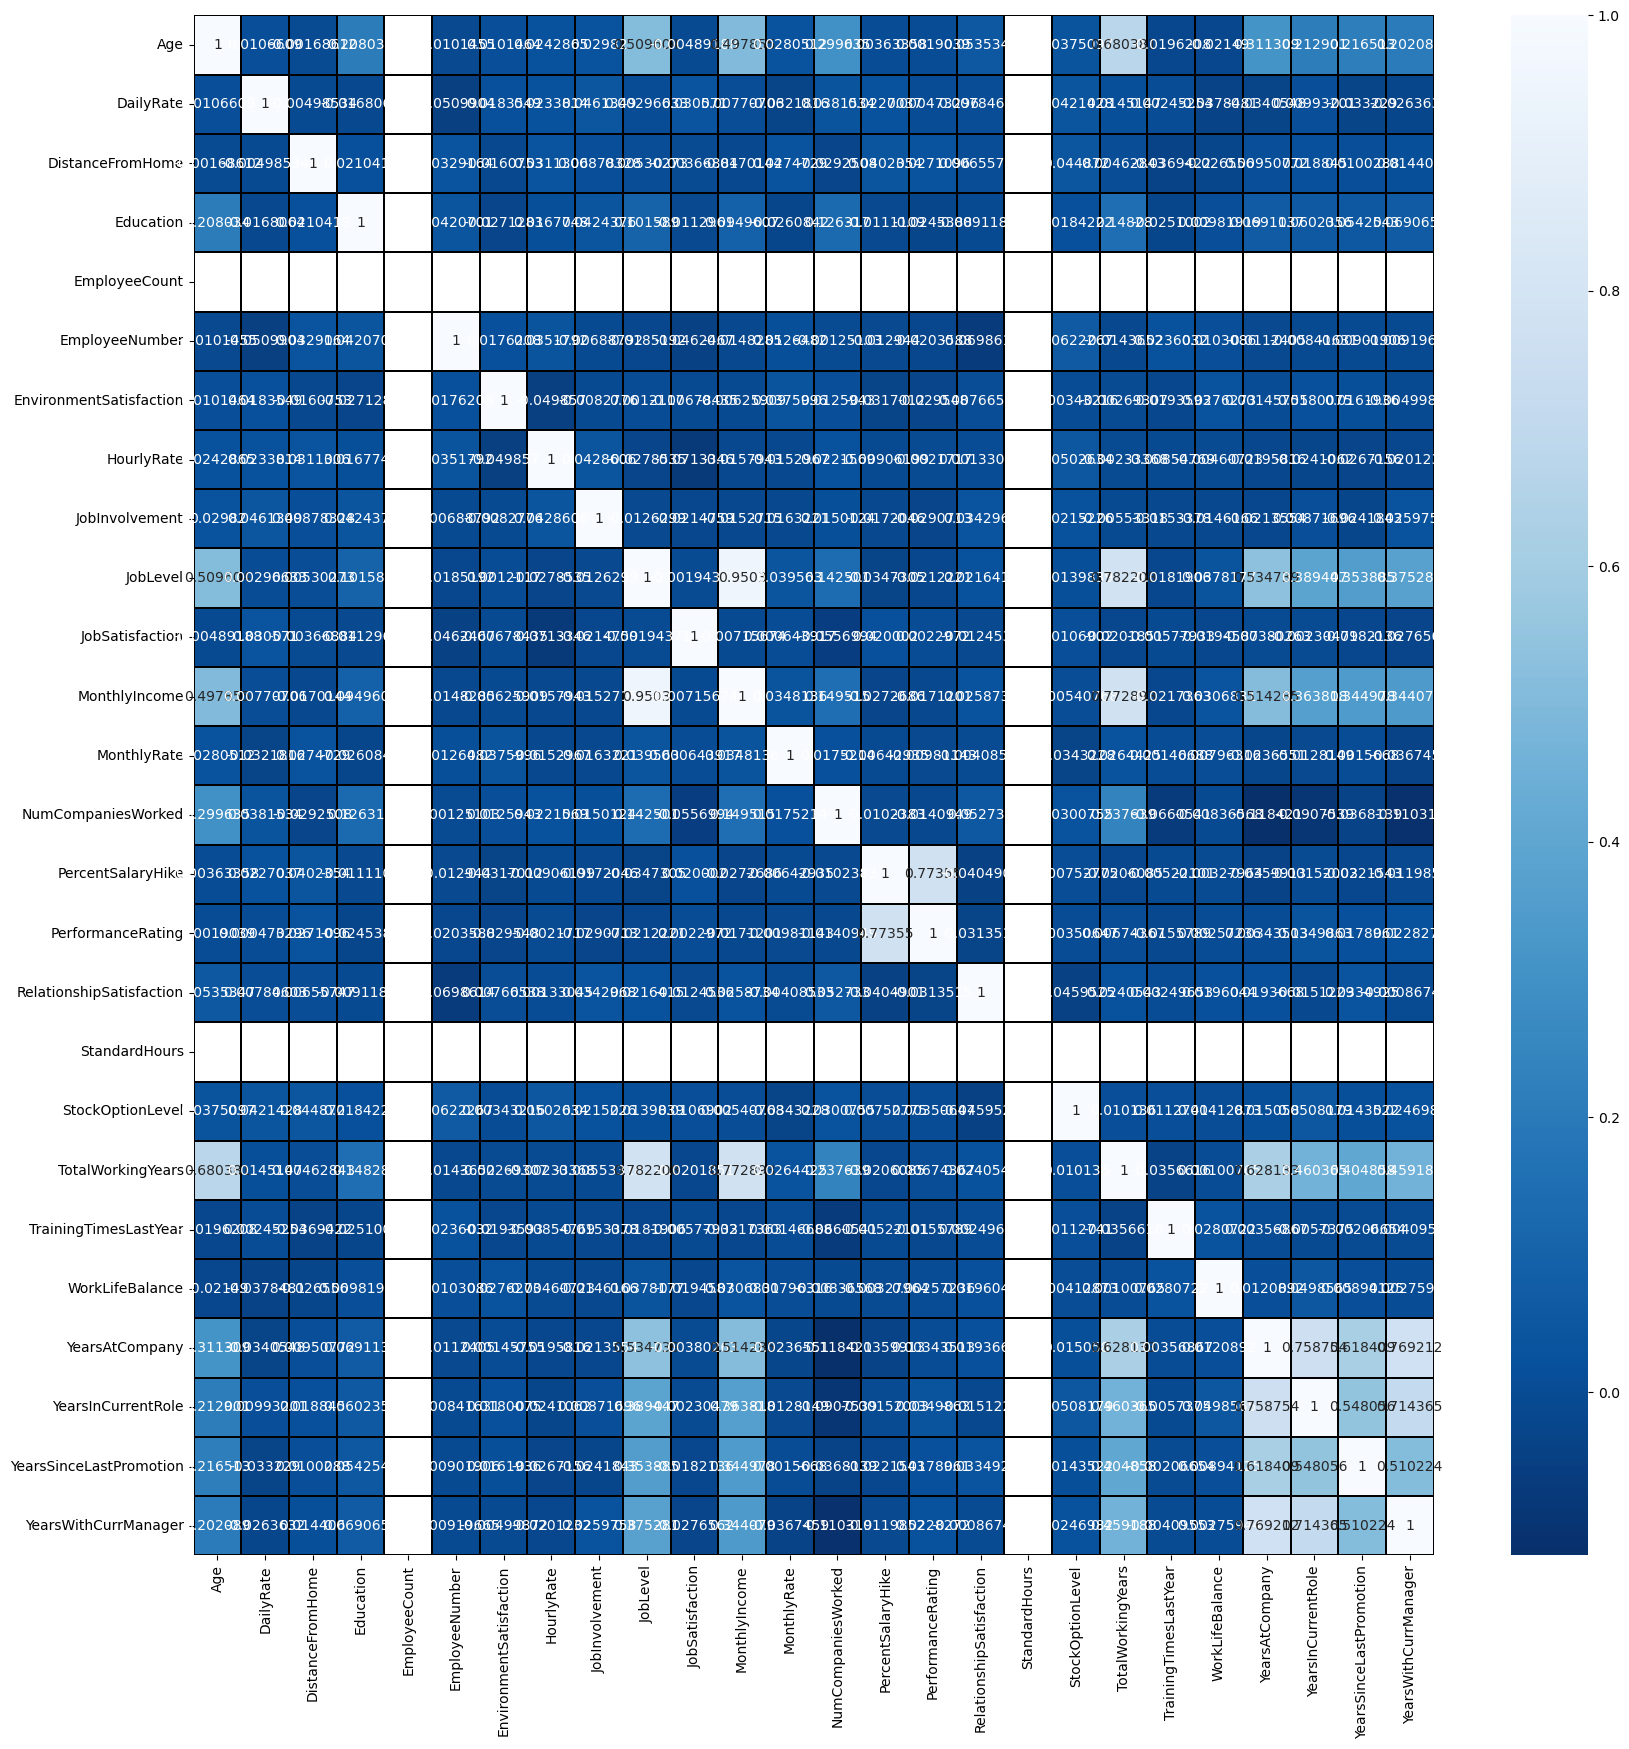

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(hr.corr(),linewidths=0.1,fmt='1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0);
plt.show()

here we can see that numcompaniesworked are negatively correlated with yearswithcurrmanager and years atcompany.
yearsatcompany is positively correlated with yearsincurrentRole, and yearswithcurrManager.
monthlyincome is positively correlated with joblevel.

In [21]:
#dropping null values
hr=hr.dropna()

In [22]:
# dropping the columns
hr.drop(['Age'],axis=1,inplace=True)
hr.drop(['DistanceFromHome'],axis=1,inplace=True)
hr.drop(['MaritalStatus'],axis=1,inplace=True)
hr.drop(['Over18'],axis=1,inplace=True)

In [23]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
hr[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']]=enc.fit_transform(hr[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime']])

In [24]:
#changing the dtype into float
hr['Attrition']=hr['Attrition'].astype(float)
hr['BusinessTravel']=hr['BusinessTravel'].astype(float)
hr['EducationField']=hr['EducationField'].astype(float)
hr['Department']=hr['Department'].astype(float)
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 1470 non-null   float64
 1   BusinessTravel            1470 non-null   float64
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   float64
 4   Education                 1470 non-null   int64  
 5   EducationField            1470 non-null   float64
 6   EmployeeCount             1470 non-null   int64  
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [25]:
hr.info

<bound method DataFrame.info of       Attrition  BusinessTravel  DailyRate  Department  Education  \
0           1.0             2.0       1102         2.0          2   
1           0.0             1.0        279         1.0          1   
2           1.0             2.0       1373         1.0          2   
3           0.0             1.0       1392         1.0          4   
4           0.0             2.0        591         1.0          1   
...         ...             ...        ...         ...        ...   
1465        0.0             1.0        884         1.0          2   
1466        0.0             2.0        613         1.0          1   
1467        0.0             2.0        155         1.0          3   
1468        0.0             1.0       1023         2.0          3   
1469        0.0             2.0        628         1.0          3   

      EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0                1.0              1               1        

checking the data after the convertaion of the data in numerical columns.

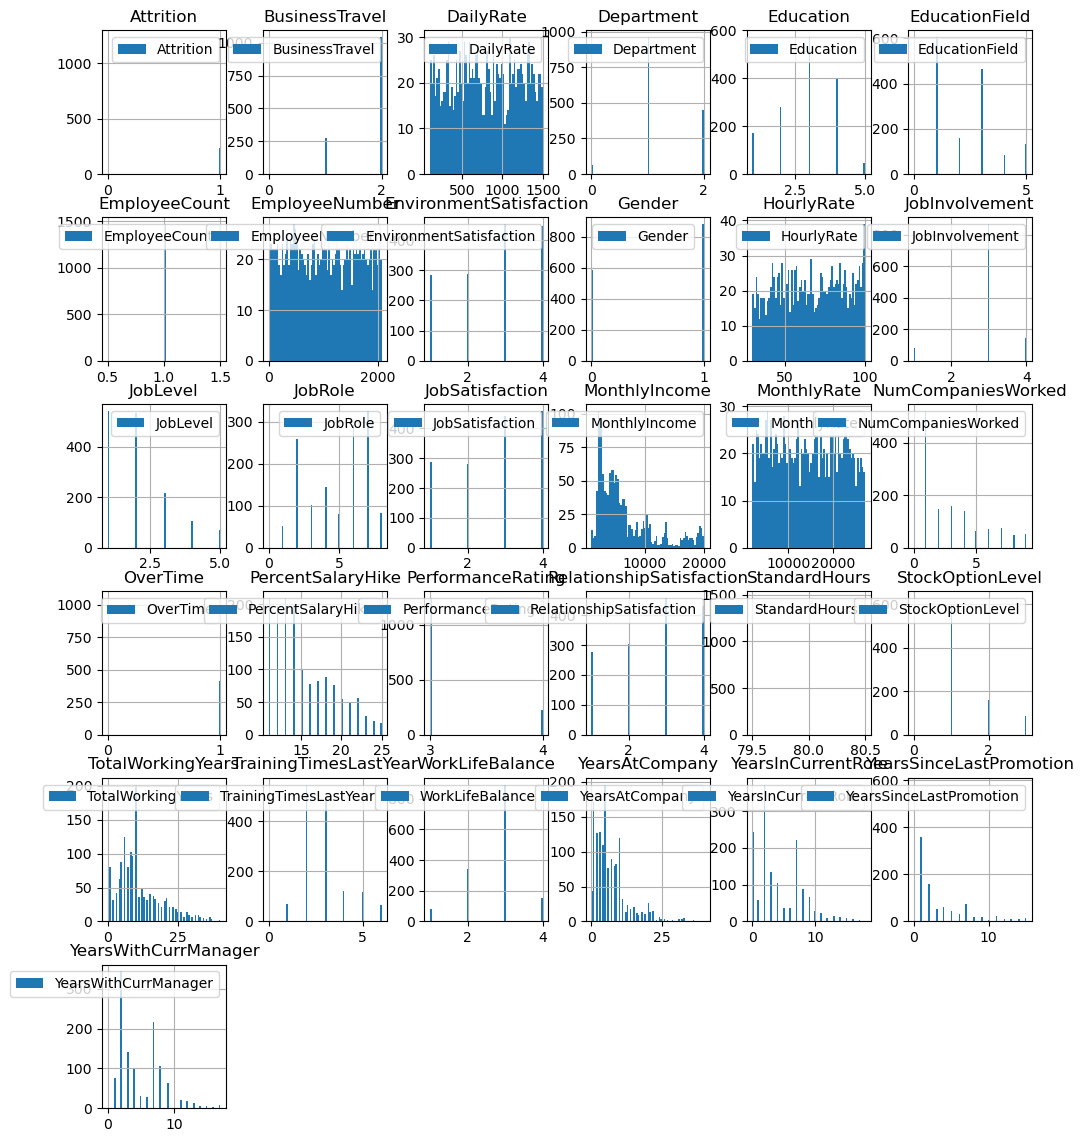

In [26]:
hr.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

visualization of all the columns through histograph.

<Axes: xlabel='Attrition', ylabel='count'>

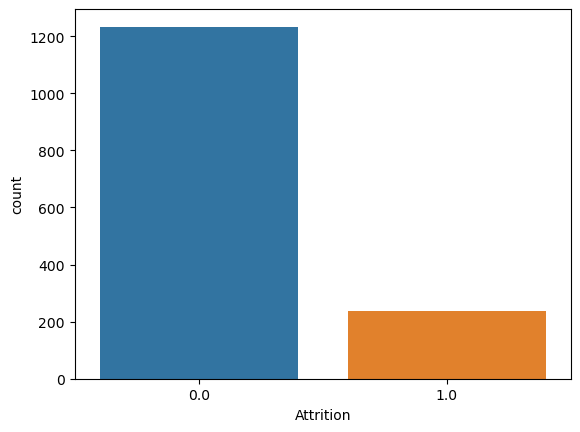

In [27]:
sns.countplot(data=hr,x='Attrition')

Visualization of the attrition column through countplot.
we can see that the yes attrition is the highest.

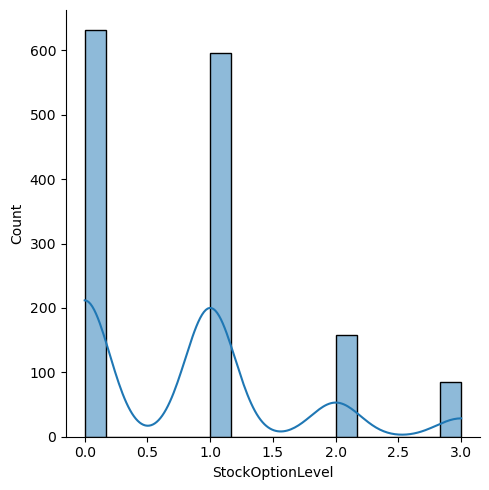

In [28]:
sns.displot(hr['StockOptionLevel'],kde=True)

Checking stock option level. The count of 0 is above 600.

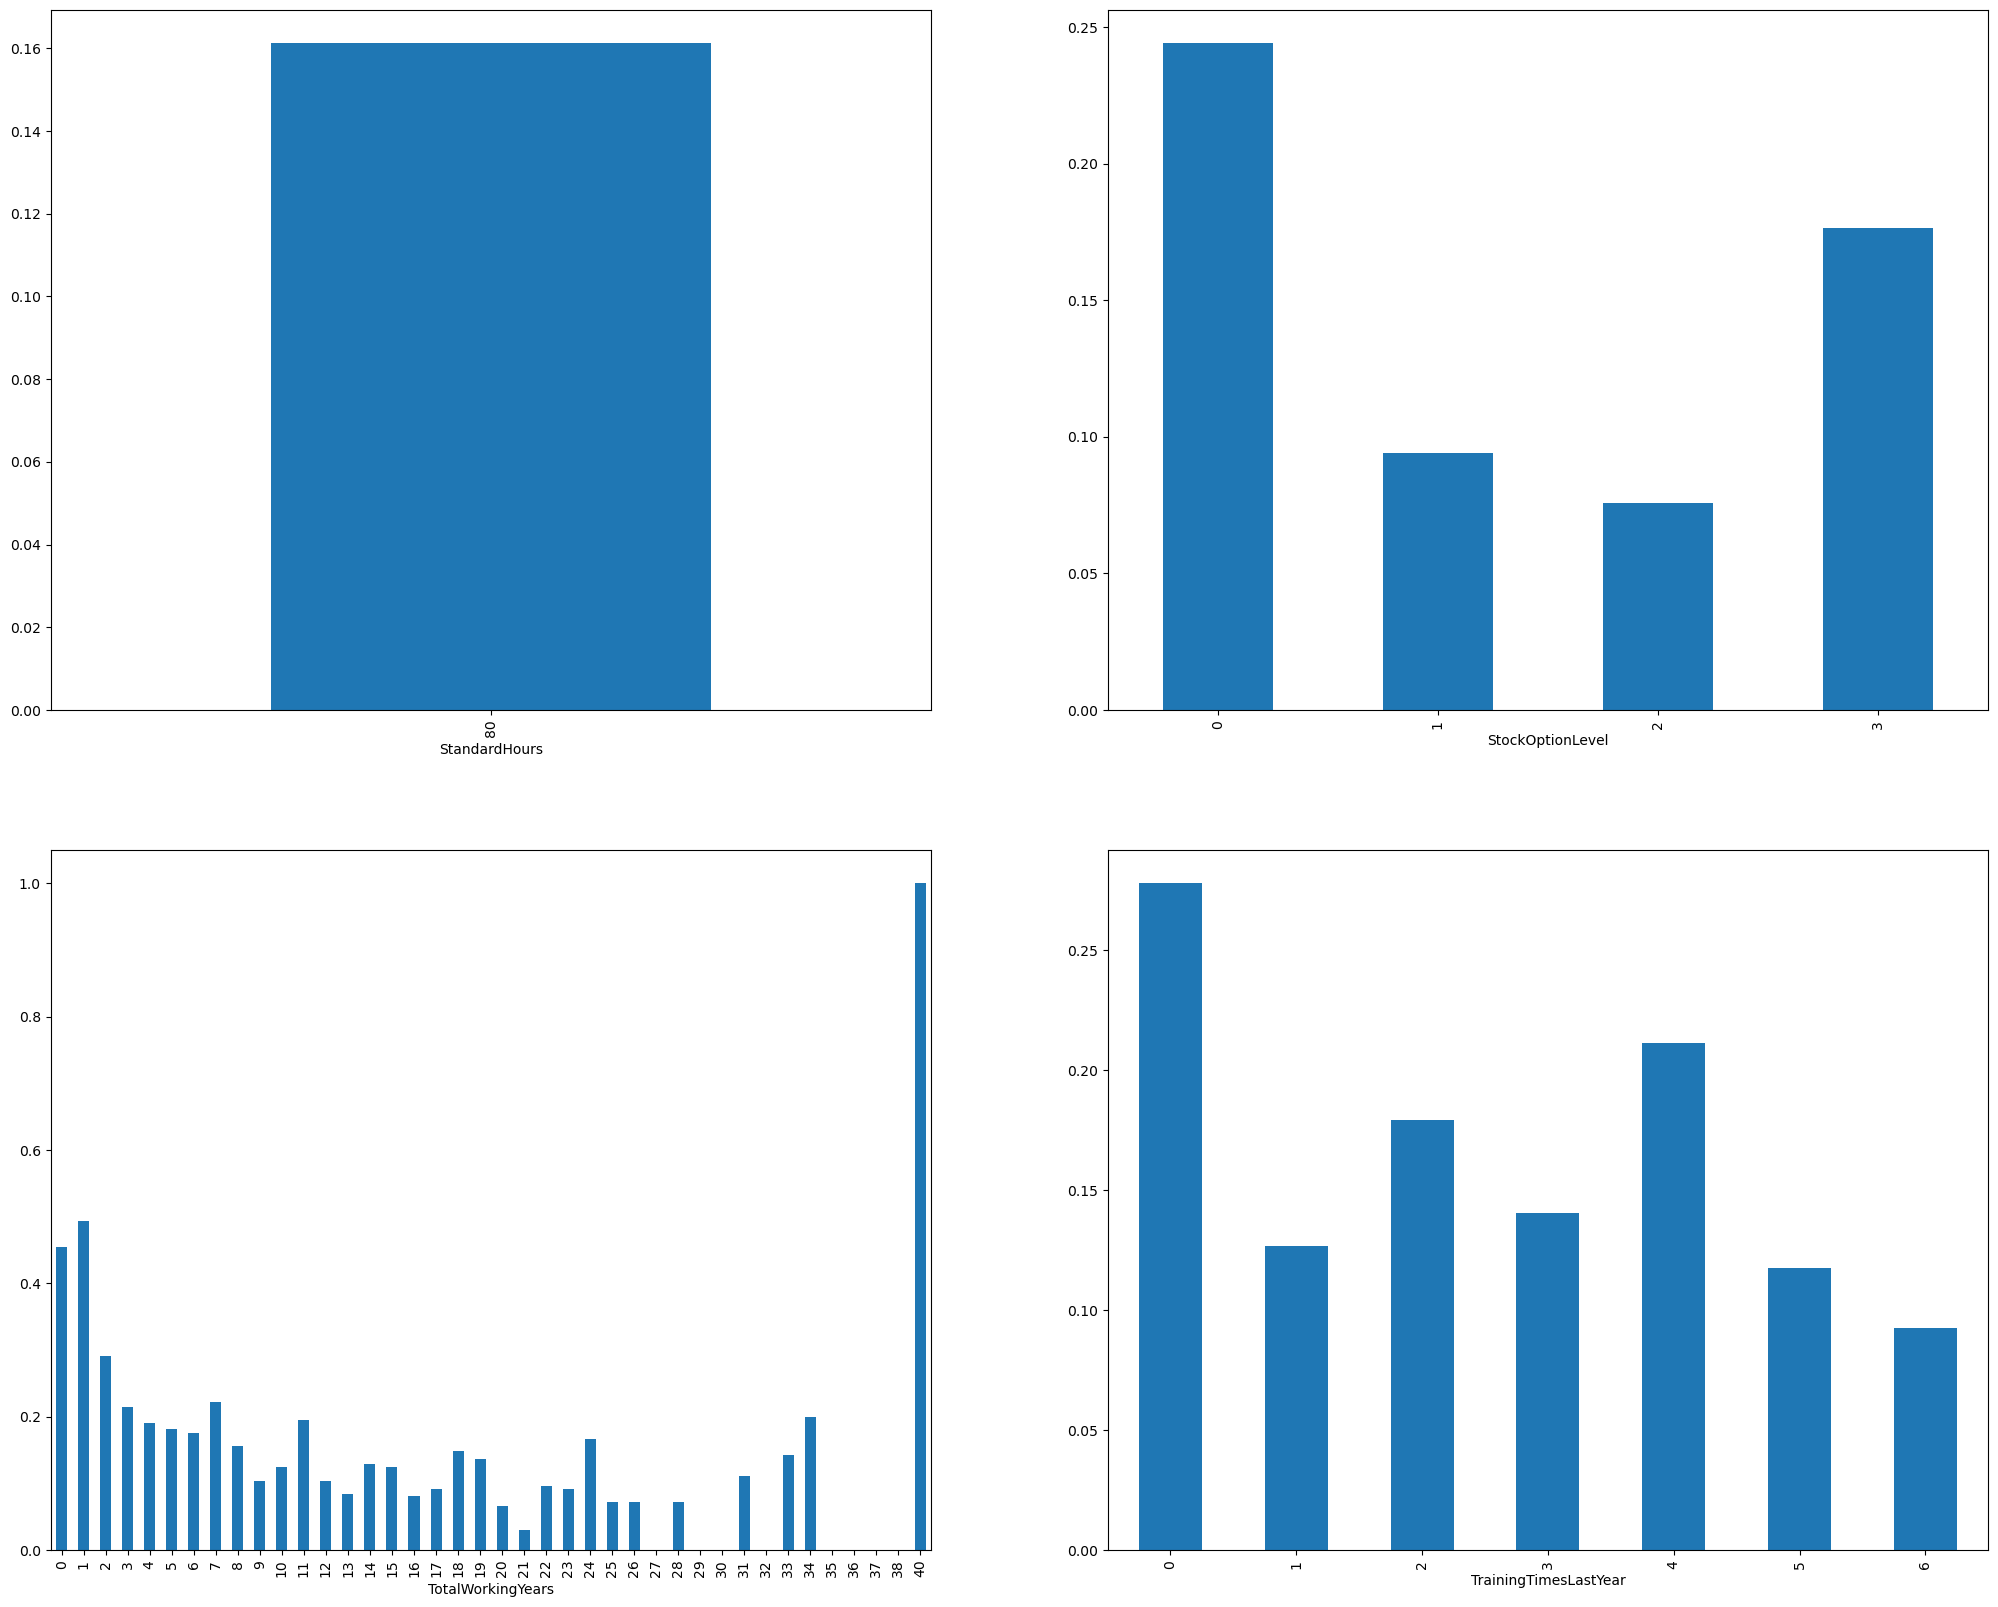

In [29]:
features=['StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear']
plt.subplots(figsize=(25,20))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    hr.groupby(col).mean()['Attrition'].plot.bar()
plt.show()

Visualization of standardtime, stockoptionlevel, totalWorkingYears and trainingtimeLastyear in comparesion with attrition.
standardTime 80 is near .016.
StockOptionLevel 0 is above 24, totalWorkingYears 40 is highest and in trainingtime last year 0 was the highest nearly 30

Attrition                      Axes(0.125,0.786098;0.133621x0.0939024)
BusinessTravel              Axes(0.285345,0.786098;0.133621x0.0939024)
DailyRate                    Axes(0.44569,0.786098;0.133621x0.0939024)
Department                  Axes(0.606034,0.786098;0.133621x0.0939024)
Education                   Axes(0.766379,0.786098;0.133621x0.0939024)
EducationField                 Axes(0.125,0.673415;0.133621x0.0939024)
EmployeeCount               Axes(0.285345,0.673415;0.133621x0.0939024)
EmployeeNumber               Axes(0.44569,0.673415;0.133621x0.0939024)
EnvironmentSatisfaction     Axes(0.606034,0.673415;0.133621x0.0939024)
Gender                      Axes(0.766379,0.673415;0.133621x0.0939024)
HourlyRate                     Axes(0.125,0.560732;0.133621x0.0939024)
JobInvolvement              Axes(0.285345,0.560732;0.133621x0.0939024)
JobLevel                     Axes(0.44569,0.560732;0.133621x0.0939024)
JobRole                     Axes(0.606034,0.560732;0.133621x0.0939024)
JobSat

<Figure size 2000x2000 with 0 Axes>

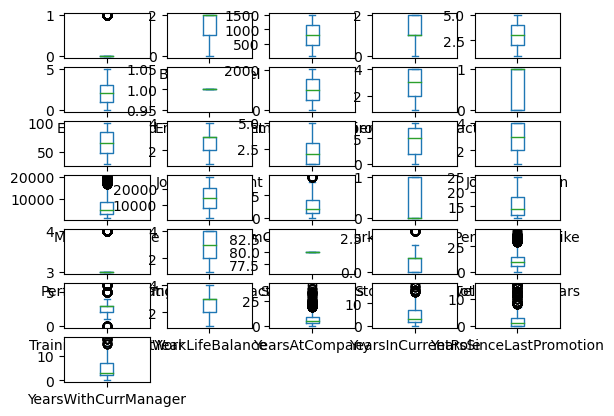

In [30]:
#checking for outliers
fig=plt.figure(figsize=(20,20))
hr.plot(kind='box',subplots=True,layout=(7,5))  

We can see the presence of outliers.

In [31]:
#checking skewness
hr.skew()

Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

# Building the model

In [32]:
x=hr.iloc[:,:-1]
y=hr.iloc[:,-1]

In [33]:
#seperating independent and target variables
x=hr.drop('Attrition',axis=1)
y=hr['Attrition']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (1470, 30)
label dimension (1470,)


In [34]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.59004834,  0.74252653,  1.40151234, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [-0.91319439, -1.2977746 , -0.49381714, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.59004834,  1.41436324, -0.49381714, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [ 0.59004834, -1.60518328, -0.49381714, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [-0.91319439,  0.54667746,  1.40151234, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [ 0.59004834, -0.43256792, -0.49381714, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [35]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    ra=RandomForestClassifier()
    ra.fit(x_train,y_train)
    pre=ra.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8934240362811792 at random state 26


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [37]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7709750566893424
[[318  63]
 [ 38  22]]
              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       381
         1.0       0.26      0.37      0.30        60

    accuracy                           0.77       441
   macro avg       0.58      0.60      0.58       441
weighted avg       0.81      0.77      0.79       441



The accuracy score of Decision tree classifier is 77.09%

In [38]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.891156462585034
[[379   2]
 [ 46  14]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       381
         1.0       0.88      0.23      0.37        60

    accuracy                           0.89       441
   macro avg       0.88      0.61      0.65       441
weighted avg       0.89      0.89      0.86       441



The accuracy score of Randomforest tree is 89.11%

In [39]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.8979591836734694
[[375   6]
 [ 39  21]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       381
         1.0       0.78      0.35      0.48        60

    accuracy                           0.90       441
   macro avg       0.84      0.67      0.71       441
weighted avg       0.89      0.90      0.88       441



The accuracy score of Logistic regression is 89.79%

In [40]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8866213151927438
[[380   1]
 [ 49  11]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       381
         1.0       0.92      0.18      0.31        60

    accuracy                           0.89       441
   macro avg       0.90      0.59      0.62       441
weighted avg       0.89      0.89      0.85       441



The accuracy score of support vector is 88.66%

In [41]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8775510204081632
[[361  20]
 [ 34  26]]
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       381
         1.0       0.57      0.43      0.49        60

    accuracy                           0.88       441
   macro avg       0.74      0.69      0.71       441
weighted avg       0.87      0.88      0.87       441



The accuracy score of Adaboost is 87.75%

In [42]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8888888888888888
[[378   3]
 [ 46  14]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       381
         1.0       0.82      0.23      0.36        60

    accuracy                           0.89       441
   macro avg       0.86      0.61      0.65       441
weighted avg       0.88      0.89      0.86       441



The accuracy score of ExtraTrees is 88.88%

# checking the cross validation

In [43]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.7755102  0.75510204 0.79591837 0.75510204 0.79931973]
0.7761904761904762
0.01904761904761907
difference between accuracu score and cross validation -0.0052154195011338


cross validation score of Decisiontree Classifier is 0.7761904761904762

In [44]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.85034014 0.85714286 0.86054422 0.86054422 0.8537415 ]
0.8564625850340135
0.0039666339420716375
difference between accuracy score and corss validation 0.03469387755102049


cross validation score of randomforest is 0.8564625850340135

In [45]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.87755102 0.86394558 0.86734694 0.86734694 0.8707483 ]
0.8693877551020408
0.0046138299204933845
difference between accuracy score and corss validation 0.02857142857142858


cross validation score of logistic regression is 0.8693877551020408

In [46]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.83333333 0.85034014 0.86394558 0.86394558 0.86394558]
0.8551020408163265
0.012092781520157237
difference between accuracy score and cross validation 0.03151927437641733


cross validation score of svc is 0.8551020408163265

In [47]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.83673469 0.86734694 0.87414966 0.86054422 0.84013605]
0.85578231292517
0.014841785189980528
difference between accuracy score and cross validation 0.0331065759637188


cross validation score of adaBoost is 0.85578231292517

In [48]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.85714286 0.85714286 0.86734694 0.86054422 0.86054422]
0.8605442176870748
0.0037260037925521544
difference between accuracy score and cross validation 0.028344671201814053


cross validation score of extratrees classifier is 0.8605442176870748

Decisiontree is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [49]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [50]:
para={'splitter':['best','random'],
      'criterion':['gini','entropy'],
     'max_depth':[None]}
dtc_cv=GridSearchCV(dtc,para,cv=10)
dtc_cv.fit(x_train,y_train)
print(dtc_cv.best_params_)

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}


In [51]:
#checking new parameters
dtc_new=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
dtc_new.fit(x_train,y_train)
y_pred_new=dtc_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.7551020408163265
85.94104308390023


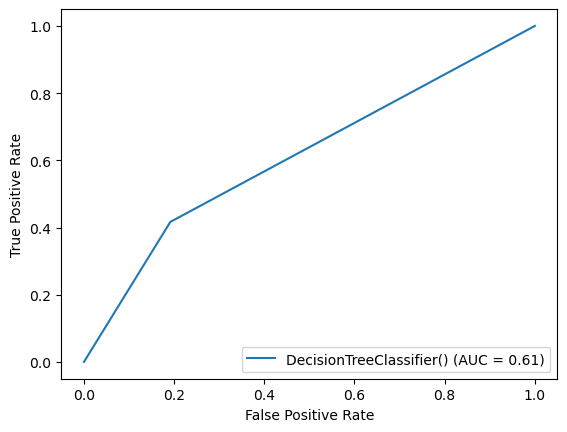

In [52]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=dtc_new)
display.plot()

Here we have plotted the ROC curve for the model and the Auc value of the best model is 60%

In [53]:
#Saving the model
import joblib
import pickle
filename="HR Analytic.pkl"
pickle.dump(dtc_new,open(filename,'wb'))

In [54]:
#predicting the save model
model=pickle.load(open('HR Analytic.pkl','rb'))

In [55]:
result=model.score(x_test,y_test)
print(result*100)

75.51020408163265


In [56]:
#checking model prediction
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
predicted,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
orginal,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


This is the prediction of HR attrition.